(2717, 128) (2717, 128)


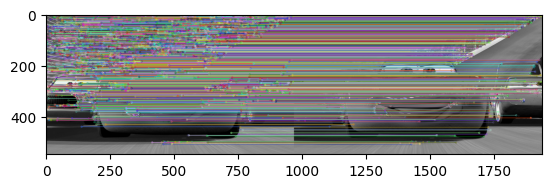

(<matplotlib.image.AxesImage at 0x190642aec70>, None)

In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

# read two input images as grayscale
img1 = cv2.imread('images/cars_images_2f.jpg',0)
img2 = cv2.imread('images/cars_images_2f.jpg', 0)

# Initiate SIFT detector
sift = cv2.SIFT_create()

# detect and compute the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
print(des1.shape,des2.shape)
# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.match(des1,des2)

# sort the matches based on distance
matches = sorted(matches, key=lambda val: val.distance)

# Draw first 50 matches.
out = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2)
plt.imshow(out), plt.show()

In [ ]:
def calcualate_ssd(des1,des2):
    ssd=0
    for i in range(len(des1)):
        diff=des1[i]-des2[i]
        ssd+=diff**2
    
    return ssd

x = calcualate_ssd([10,34,23,55],[9,35,12,32])
x


652

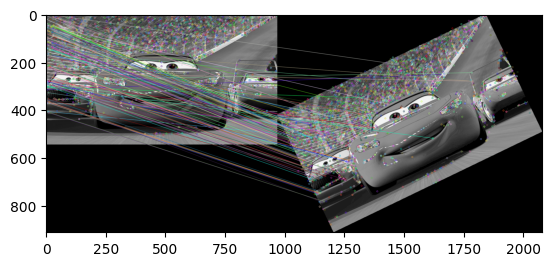

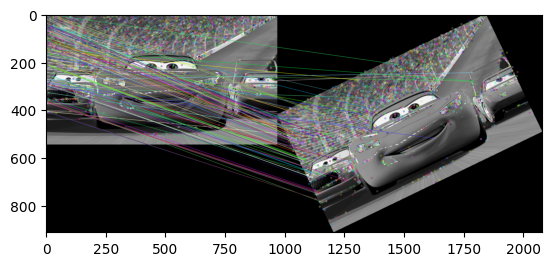

SSD Computation Time:  2.975645065307617 seconds
NCC Computation Time:  1.889639139175415 seconds


In [4]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
# Load the two images
img1 = cv2.imread('images/cars_images_2f.jpg', 0)
img2 = cv2.imread('images/image.png', 0)

# Create SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
kp1, desc1 = sift.detectAndCompute(img1, None)
kp2, desc2 = sift.detectAndCompute(img2, None)


# SSD Matching
start_time = time.time()
matches = []
for i in range(len(desc1)):
    dist = np.sum(np.square(desc2 - desc1[i]), axis=1)
    idx = np.argmin(dist)
    matches.append(cv2.DMatch(i, idx, dist[idx]))
ssd_time = time.time() - start_time



# NCC Matching
start_time = time.time()
matches2 = []
for i in range(len(desc1)):
    scores = np.dot(
        desc2, desc1[i]) / (np.linalg.norm(desc2, axis=1) * np.linalg.norm(desc1[i]))
    idx = np.argmax(scores)
    matches2.append(cv2.DMatch(i, idx, scores[idx]))
ncc_time = time.time() - start_time

# Draw the matched keypoints on the images
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:100], None)
img_matches2 = cv2.drawMatches(img1, kp1, img2, kp2, matches2[:100], None)

# Display the matched images and computation times
plt.imshow(img_matches)
plt.show()
plt.imshow(img_matches2)
plt.show()
print("SSD Computation Time: ", ssd_time, "seconds")
print("NCC Computation Time: ", ncc_time, "seconds")



In [4]:

# Python Program illustrating
# working of argmin()

import numpy as geek

# Working on 2D array
array = geek.arange(10).reshape(2, 5)
print("array : \n", array)

array[0][0] = 10
array[1][1] = 0
array[0][1] = 1
print("\narray : \n", array)

# Returns min element
print("\narray : ", geek.argmin(array))

# First occurrence of an min element is given
print("\nmin ELEMENT INDICES : ", geek.argmin(array, axis=0))


array : 
 [[0 1 2 3 4]
 [5 6 7 8 9]]

array : 
 [[10  1  2  3  4]
 [ 5  0  7  8  9]]

array :  6

min ELEMENT INDICES :  [1 1 0 0 0]


In [1]:
import numpy as np
import time
import cv2

def match_features(features1, features2, method='ssd', threshold=0.7):
    """
    Matches features from two sets of features using either sum of squared differences (SSD) or
    normalized cross correlation (NCC).

    Args:
        features1: A list of feature descriptors from the first image.
        features2: A list of feature descriptors from the second image.
        method: A string specifying the matching method to use. Either 'ssd' for SSD or 'ncc' for NCC.
        threshold: A float specifying the matching threshold. Only matches with a similarity score greater than
            this threshold will be considered.

    Returns:
        A list of tuples representing the matches. Each tuple contains the indices of a matching feature in
        features1 and features2, and their similarity score.
    """
    # Convert the feature descriptors to arrays
    features1 = np.array(features1)
    features2 = np.array(features2)

    # Initialize the list of matches
    matches = []

    # Calculate the similarity scores between each pair of features
    if method == 'ssd':
        # Calculate the sum of squared differences (SSD) between each pair of features
        for i in range(len(features1)):
            ssd = np.sum((features2 - features1[i])**2, axis=1)
            best_match_idx = np.argmin(ssd)
            second_best_match_idx = np.argsort(ssd)[1]

            # Check if the best match is significantly better than the second best match
            if ssd[best_match_idx] < threshold**2 * ssd[second_best_match_idx]:
                matches.append((i, best_match_idx, ssd[best_match_idx]))

    elif method == 'ncc':
        # Normalize the feature vectors
        features1_norm = (features1 - np.mean(features1, axis=1,
                          keepdims=True)) / np.std(features1, axis=1, keepdims=True)
        features2_norm = (features2 - np.mean(features2, axis=1,
                          keepdims=True)) / np.std(features2, axis=1, keepdims=True)

        # Calculate the normalized cross correlation (NCC) between each pair of features
        for i in range(len(features1)):
            ncc = np.sum(
                features1_norm[i] * features2_norm, axis=1) / features1.shape[1]
            best_match_idx = np.argmax(ncc)

            # Check if the best match is above the threshold
            if ncc[best_match_idx] > threshold:
                matches.append((i, best_match_idx, ncc[best_match_idx]))

    return matches


# Load the images
img1 = cv2.imread('images/cars_images_2f.jpg')
img2 = cv2.imread('images/cars_images_2f.jpg')

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect the keypoints and compute the descriptors for the images
start_time = time.time()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)
print('Feature detection and description time:', time.time() - start_time)

# Match the features using SSD
start_time = time.time()
matches_ssd = match_features(
    descriptors1, descriptors2, method='ssd', threshold=0.7)
print('Matching time (SSD):', time.time() - start_time)
print(matches_ssd)

# Match the features using NCC
start_time = time.time()
matches_ncc = match_features(descriptors1, descriptors2, method='ncc', threshold=0.7)
print('Matching time (NCC):', time.time() - start_time)

# Draw the matched keypoints on the images
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches_ssd, None)

cv2.imshow('SSD Matches', img_matches)
cv2.waitKey(0)


Feature detection and description time: 0.23730230331420898
Matching time (SSD): 2.549288749694824
[(0, 0, 0.0), (1, 1, 0.0), (2, 2, 0.0), (3, 3, 0.0), (4, 4, 0.0), (5, 5, 0.0), (6, 6, 0.0), (7, 7, 0.0), (8, 8, 0.0), (9, 9, 0.0), (10, 10, 0.0), (11, 11, 0.0), (12, 12, 0.0), (13, 13, 0.0), (14, 14, 0.0), (15, 15, 0.0), (16, 16, 0.0), (17, 17, 0.0), (18, 18, 0.0), (19, 19, 0.0), (20, 20, 0.0), (21, 21, 0.0), (22, 22, 0.0), (23, 23, 0.0), (24, 24, 0.0), (25, 25, 0.0), (26, 26, 0.0), (27, 27, 0.0), (28, 28, 0.0), (29, 29, 0.0), (30, 30, 0.0), (31, 31, 0.0), (32, 32, 0.0), (33, 33, 0.0), (34, 34, 0.0), (35, 35, 0.0), (36, 36, 0.0), (37, 37, 0.0), (38, 38, 0.0), (39, 39, 0.0), (40, 40, 0.0), (41, 41, 0.0), (42, 42, 0.0), (43, 43, 0.0), (44, 44, 0.0), (45, 45, 0.0), (46, 46, 0.0), (47, 47, 0.0), (48, 48, 0.0), (49, 49, 0.0), (50, 50, 0.0), (51, 51, 0.0), (52, 52, 0.0), (53, 53, 0.0), (54, 54, 0.0), (55, 55, 0.0), (56, 56, 0.0), (57, 57, 0.0), (58, 58, 0.0), (59, 59, 0.0), (60, 60, 0.0), (61, 

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'drawMatches'
> Overload resolution failed:
>  - Can't parse 'matches1to2'. Sequence item with index 0 has a wrong type
>  - Can't parse 'matches1to2'. Sequence item with index 0 has a wrong type
>  - drawMatches() missing required argument 'matchesThickness' (pos 7)
>  - drawMatches() missing required argument 'matchesThickness' (pos 7)


Clean Code

In [3]:

from cv2 import sqrt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal
from scipy.spatial.distance import cdist
import time


In [4]:
original_img = cv2.imread("./images/Sift.jpg")
template_img =cv2.imread("./images/Sift_ori.jpg")

original_img = cv2.resize(original_img,(256,256))
template_img = cv2.resize(template_img,(256,256))

In [5]:
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)


In [6]:
sift = cv2.SIFT_create()
kp1, descriptor1 = sift.detectAndCompute(original_img, None)
kp2, descriptor2 = sift.detectAndCompute(template_img, None)


In [7]:
print("1",descriptor1)
print("2",descriptor2)
print("1",len(descriptor1))
print("2",len(descriptor2))

1 [[  0.   0.   0. ...   0.   0.   6.]
 [  1.   0.   0. ...  41. 123.   0.]
 [  0.   0.   0. ...   0.   0.   5.]
 ...
 [  0.   0.   0. ...   0.   0.   4.]
 [  0.   0.   0. ...  33.   6.   0.]
 [  0.   0.   0. ...   0.   0.   3.]]
2 [[ 22.  10. 113. ...   0.  13.  39.]
 [ 21.  64.  32. ...   0.   0.   0.]
 [  0.  10.  75. ...   4.   0.   0.]
 ...
 [  0.   0.   7. ...  23.  33.  30.]
 [  0.   0.   1. ...  11.   4.   4.]
 [  3.  14.   9. ...  17.   7.   2.]]
1 127
2 107


In [8]:
def calculateSSD(desc_image1, desc_image2):
    sum_square = 0
    for m in range(len(desc_image2)-1):
        sum_square += (desc_image1[m] - desc_image2[m]) ** 2
    # The (-) sign here because the condition we applied after this function call is reversed
    SSD = - (np.sqrt(sum_square))
    return SSD


In [9]:
def calculate_NCC(desc_image1, desc_image2):

    normlized_output1 = (desc_image1 - np.mean(desc_image1)
                         ) / (np.std(desc_image1))
    normlized_output2 = (desc_image2 - np.mean(desc_image2)
                         ) / (np.std(desc_image2))
    correlation_vector = np.multiply(normlized_output1, normlized_output2)
    NCC = float(np.mean(correlation_vector))

    return NCC


In [10]:
def feature_matching_temp(descriptor1, descriptor2, method):
    if(method == 'SSD'):
        ssd_time_start = time.time()
        # distances = cdist(descriptor1, descriptor2, metric = 'sqeuclidean')
    elif method == "NCC":
        ncc_time_start = time.time()
        # distances = cdist(descriptor1, descriptor2, metric = 'correlation')
    keyPoints1 = descriptor1.shape[0]
    keyPoints2 = descriptor2.shape[0]

    #Store matching scores
    matched_features = []

    for kp1 in range(keyPoints1):
        # Initial variables (will be updated)
        distance = -np.inf
        y_index = -1
        for kp2 in range(keyPoints2):
            if method == "SSD":
               score = calculateSSD(descriptor1[kp1], descriptor2[kp2])
            elif method == "NCC":
                score = calculate_NCC(descriptor1[kp1], descriptor2[kp2])
            if score > distance:
                distance = score
                y_index = kp2

        feature = cv2.DMatch()
        #The index of the feature in the first image
        feature.queryIdx = kp1
        # The index of the feature in the second image
        feature.trainIdx = y_index
        #The distance between the two features
        feature.distance = distance
        matched_features.append(feature)
    if(method == 'SSD'):
        ssd_time_end = time.time()
        print(
            f"Execution time of SSD matching is {ssd_time_end - ssd_time_start}  sec")

    if(method == 'NCC'):
        ncc_time_end = time.time()
        print(
            f"Execution time of CORR matching is {ncc_time_end - ncc_time_start}  sec")

    return matched_features


Execution time of SSD matching is 3.788304328918457  sec


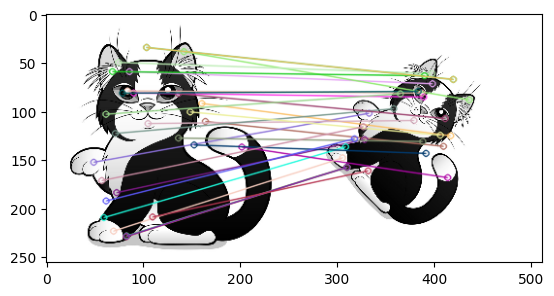

In [11]:


# Apply feature matching using SSD ::
matched_features = feature_matching_temp(descriptor1, descriptor2, "SSD")
matched_features = sorted(
    matched_features, key=lambda x: x.distance, reverse=True)
matched_image = cv2.drawMatches(
    original_img, kp1, template_img, kp2, matched_features[:30], template_img, flags=2)

plt.imshow(matched_image)
plt.show()


Execution time of CORR matching is 0.8851108551025391  sec


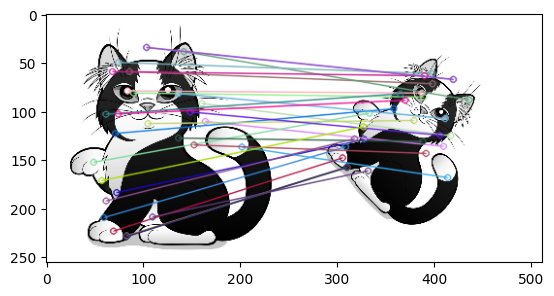

In [12]:
# Apply feature matching using NCC
matched_features = feature_matching_temp(descriptor1, descriptor2, "NCC")
matched_features = sorted(
    matched_features, key=lambda x: x.distance, reverse=True)
matched_image = cv2.drawMatches(
    original_img, kp1, template_img, kp2, matched_features[:30], template_img, flags=2)
plt.imshow(matched_image)
plt.show()


Test Build in function


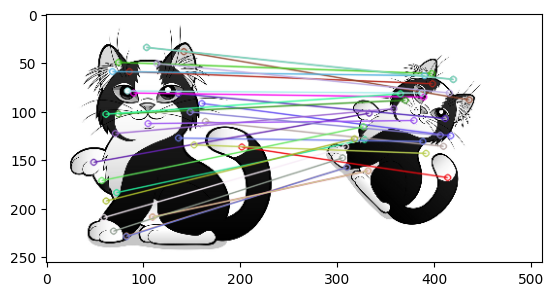

In [13]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptor1, descriptor2)
matches = sorted(matches, key=lambda x: x.distance)
matched_image = cv2.drawMatches(original_img, kp1, template_img, kp2,
                                matches[:30], template_img, flags=2)

plt.imshow(matched_image)
plt.show()
